# Name - Akshay Naik

## Task 3 - To explore Decision Tree Algorithm using 'Iris' dataset and visualize it graphiclly.





### Importing libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading the csv file

In [38]:
df = pd.read_csv('Iris.csv')

#Reading firt five rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
#Renaming the columns 

df=df.rename(columns={'SepalLengthCm':'Sepal_Length','SepalWidthCm':'Sepal_Width',
                          'PetalLengthCm':'Petal_Length','PetalWidthCm':'Petal_Width'})
df.head()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Inspecting data

In [40]:
df.shape

(150, 6)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal_Length  150 non-null    float64
 2   Sepal_Width   150 non-null    float64
 3   Petal_Length  150 non-null    float64
 4   Petal_Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There are 4 - Numerical Features and one categorical column.There are totally 150 rows or observations are in data

In [42]:
df.describe()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [44]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

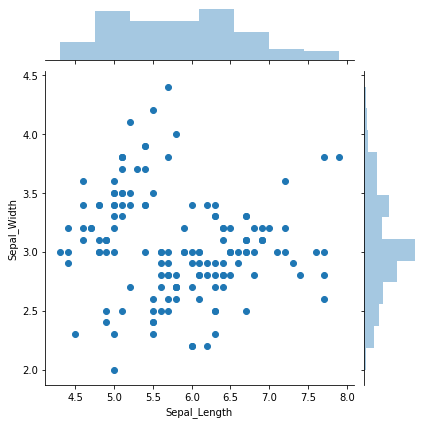

In [7]:
sns.jointplot(x='Sepal_Length',y= 'Sepal_Width', data=df)
plt.show()

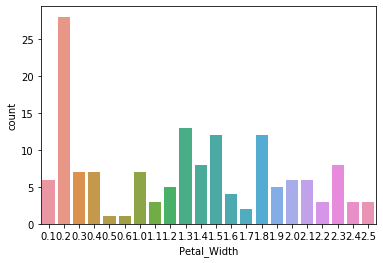

In [8]:
sns.countplot(x='Petal_Width' , data=df)
plt.show()

### Checking for any null values.

In [9]:
df.isnull().sum()

Id              0
Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

There are no null values in the dataset.

### Checking for any outliers

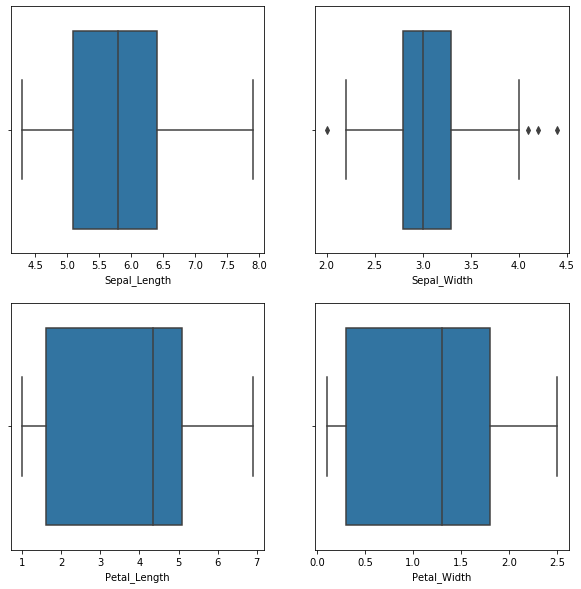

In [12]:
plt.figure(figsize = (10,10))
feature = df.columns[1:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(df[i[1]])

### Capping 'Sepal_Width' for treating outliers

In [16]:
# capping

q1 = df['Sepal_Width'].quantile(0.01)
q4 = df['Sepal_Width'].quantile(0.99)

df['Sepal_Width'][df['Sepal_Width']<= q1] = q1
df['Sepal_Width'][df['Sepal_Width']>= q4] = q4


### Now lets define the decision tree algorithm

In [19]:
# Defining the decision tree algorithm
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1].values
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [22]:
#spliting iris data into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
#Training the Decision Tree Classification model on the Training se

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [25]:
y_pred = classifier.predict(X_test)  # predicting the test results

In [26]:

# Making the predictions
    
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa


In [27]:
# Evaluation

#Confision matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


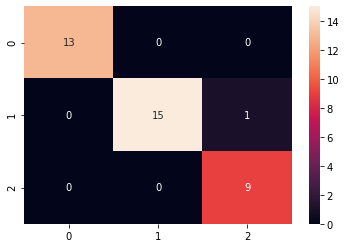

In [28]:
# Heat map
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

### Let us visualize the Decision Tree to understand it better


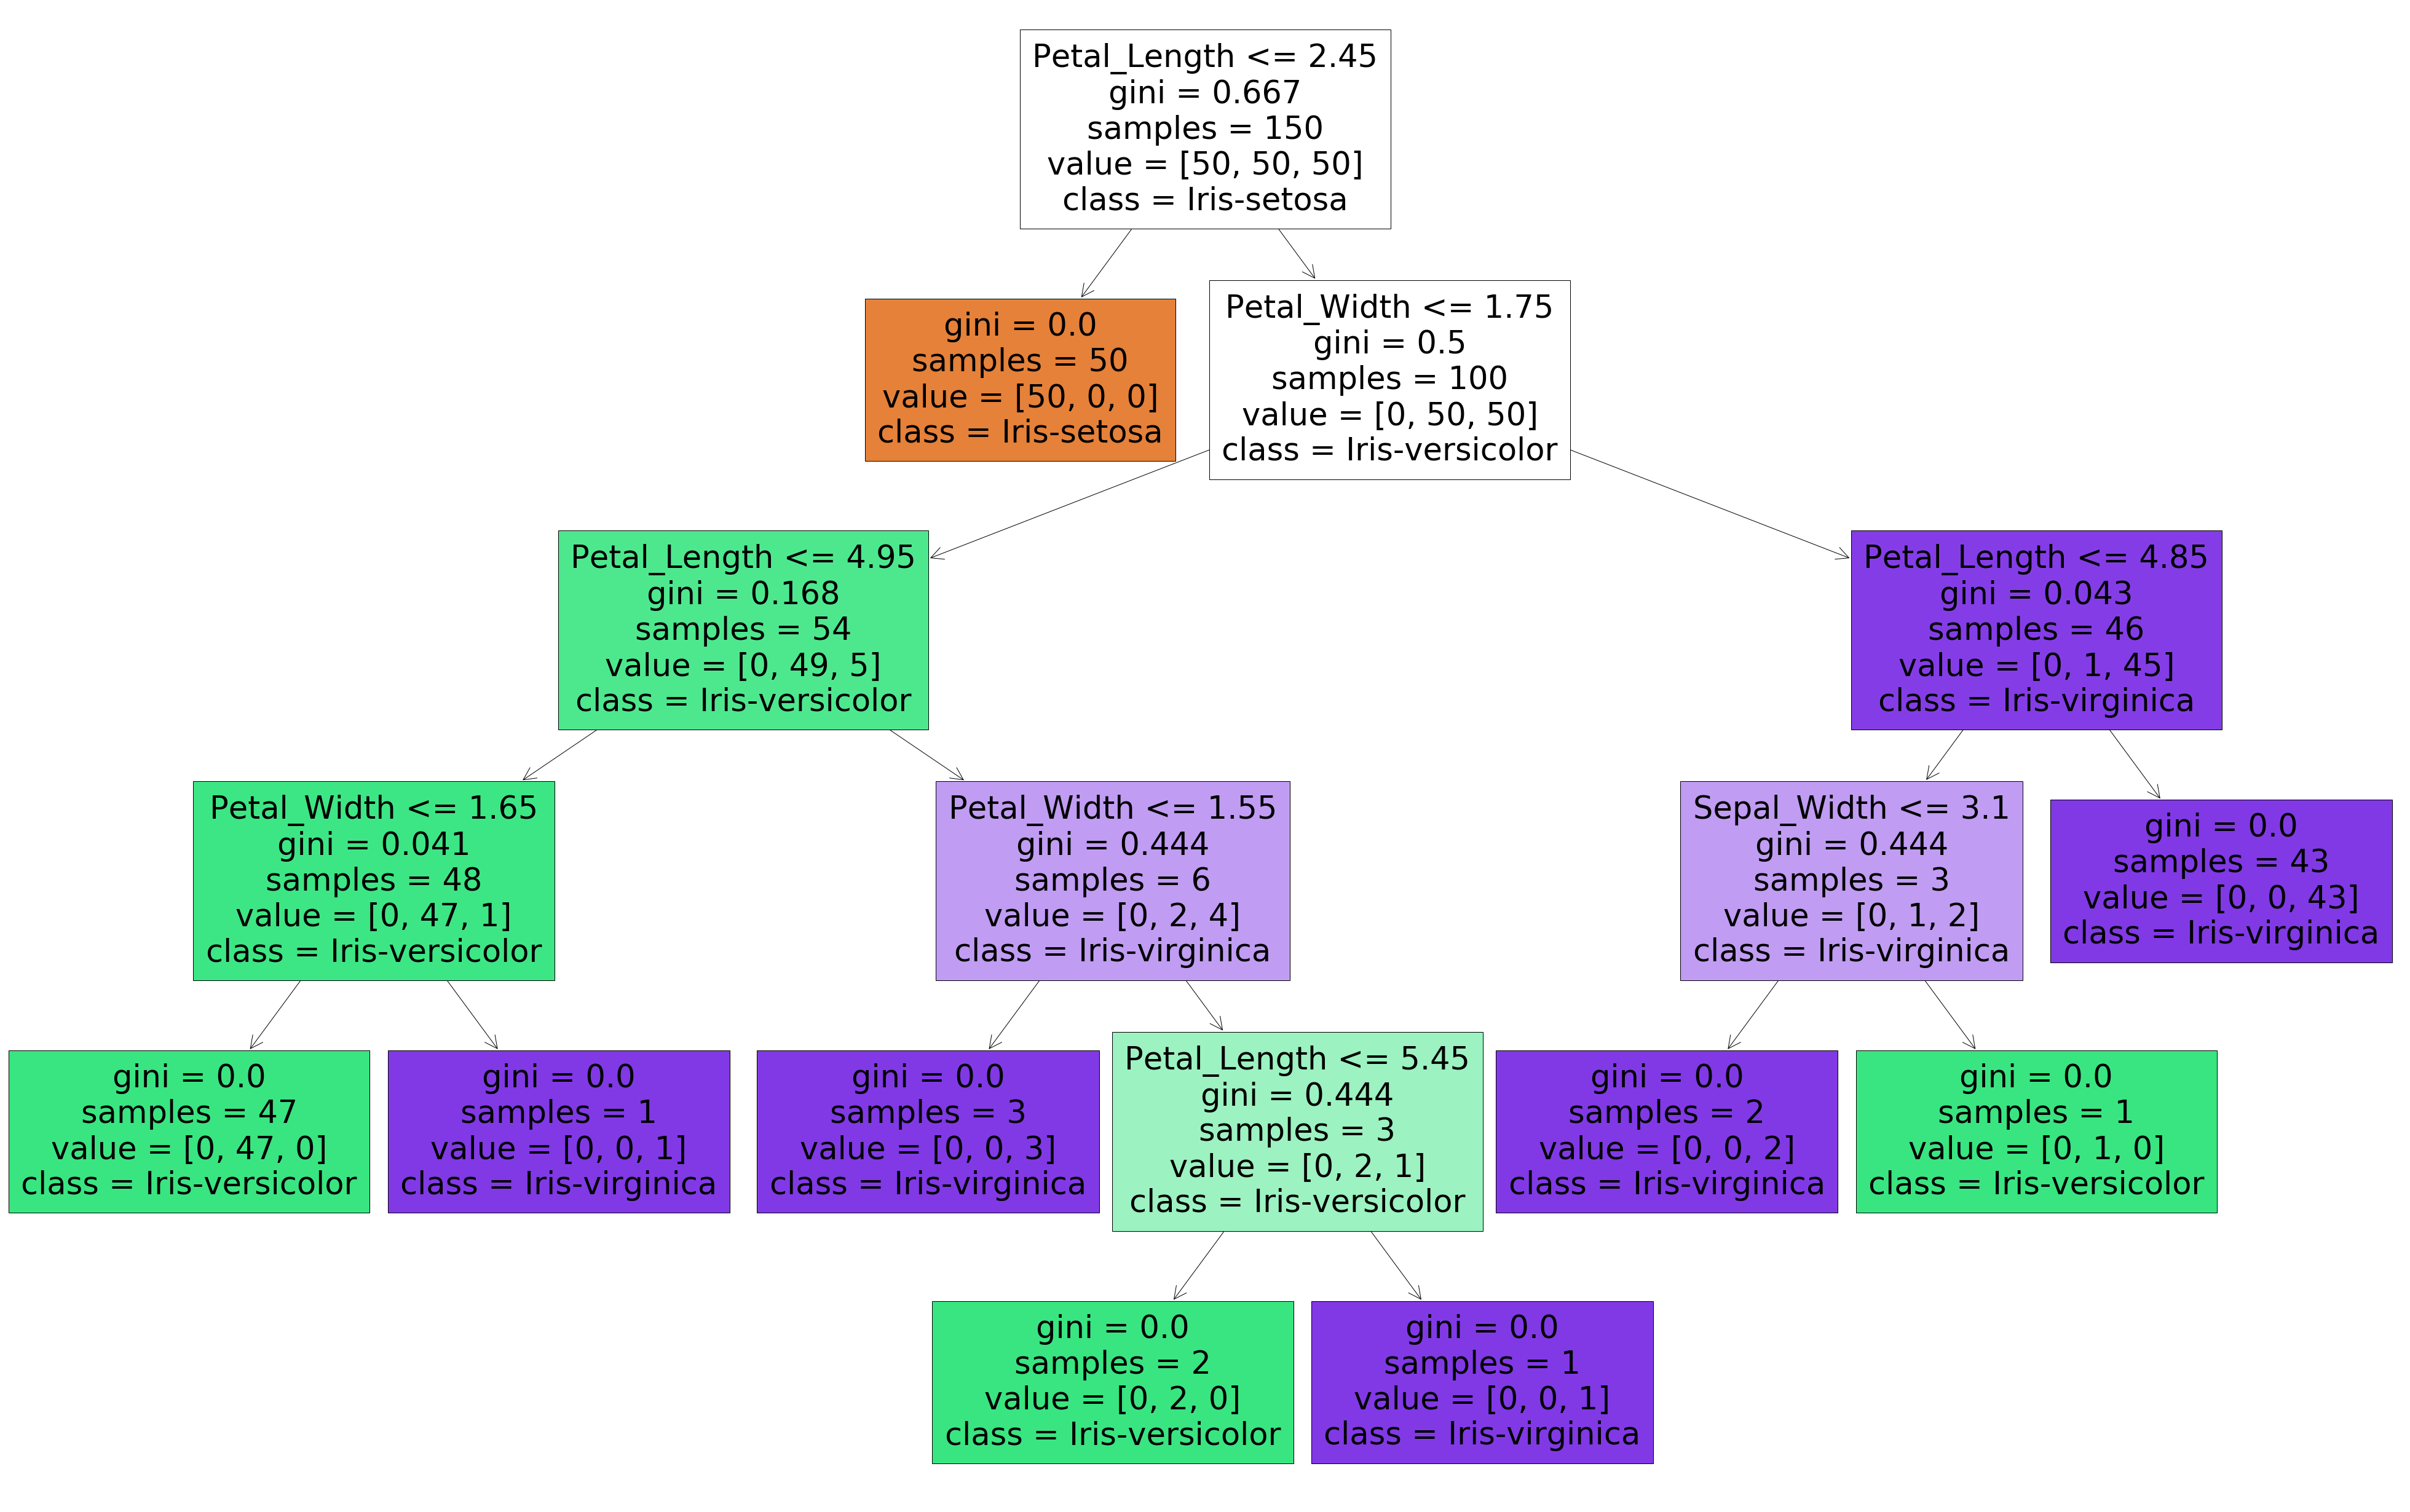

In [56]:
import matplotlib.pyplot as plt
from sklearn import tree

feature_names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
features_names = list(df.columns[:4])

from sklearn.tree import plot_tree
plt.figure(figsize=(70,45))
plot_tree(dtree,feature_names=feature_names,class_names=class_names,filled=True);


**You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**